In [12]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )
import matplotlib.pyplot as plt
  
# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression

# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
  
  



In [13]:

# Importing dataset    
df = pd.read_csv( "../../datasets/marks.txt" )
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(
  X, Y, test_size = 1/3, random_state = 0 )

# Model training    
model = LogitRegression( learning_rate = 0.01, iterations = 1000 )

model.fit( X_train, Y_train )    
model1 = LogisticRegression()    
model1.fit( X_train, Y_train)

# Prediction on test set
Y_pred = model.predict( X_test )    
Y_pred1 = model1.predict( X_test )

# measure performance    
correctly_classified = 0    
correctly_classified1 = 0

# counter    
count = 0    
for count in range( np.size( Y_pred ) ) :  

    if Y_test[count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1

    if Y_test[count] == Y_pred1[count] :            
        correctly_classified1 = correctly_classified1 + 1

    count = count + 1

print( "Accuracy on test set by our model       :  ", ( 
  correctly_classified / count ) * 100 )
print( "Accuracy on test set by sklearn model   :  ", ( 
  correctly_classified1 / count ) * 100 )
  

Accuracy on test set by our model       :   63.63636363636363
Accuracy on test set by sklearn model   :   87.87878787878788


In [16]:
def plot_decision_boundary(X, w, b):
    w = w[:,np.newaxis]
    print(X.shape)
    print(w.shape)
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    
    x1 = [min(X[:,0]), max(X[:,0])]
    print(x1)
    m = -w[0]/w[1]
    print(m)
    c = -b/w[1]
    print(c)
    #x2 = m*x1 + c
    x2 = np.array([m * x for x in x1]) + c
    print(x2)
    
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0], X[:, 1], "g^")
    plt.plot(X[:, 0], X[:, 1], "bs")
    #plt.xlim([-2, 2])
    #plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

(99, 2)
(2, 1)
[30.05882244669796, 99.82785779692128]
[3.00713209]
[-6.52097843]
[[ 83.86987115]
 [293.67457626]]


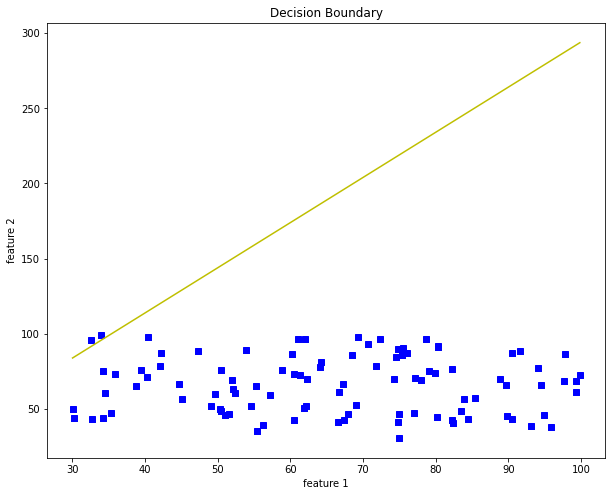

In [17]:
plot_decision_boundary(X, model.W, model.b)

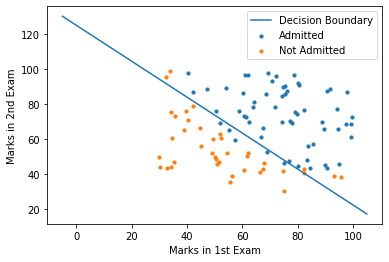

In [24]:
#x_values = [np.min(X[:, 0] - 5), np.max(X[:, 1] + 5)]
x_values = [-5, 105]
parameters = np.array([model.b] + [x for x in model.W])
parameters = np.array([-25.16131856, 0.20623159, 0.20147149])
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
admitted = df.loc[Y == 1]
# filter out the applicants that din't get admission
not_admitted = df.loc[Y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [58]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


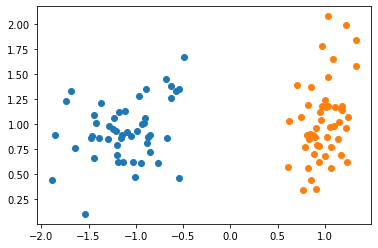

In [59]:
good = X[y == 0]
bad = X[y == 1]
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])

In [69]:
model = LogitRegression( learning_rate = 0.01, iterations = 1000 )

model.fit( X, y ) 

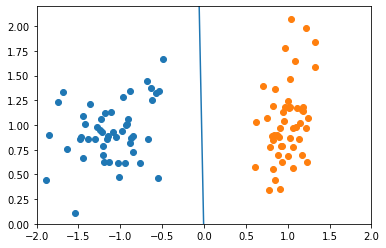

In [77]:
x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
x_values = [-5, 105]
parameters = np.array([model.b] + [x for x in model.W])
#parameters = np.array([-25.16131856, 0.20623159, 0.20147149])
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

# plots

plt.xlim([-2,2])
plt.ylim([0,2.2])
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])
plt.plot(x_values, y_values)
plt.show()

(100, 2)
(100,)


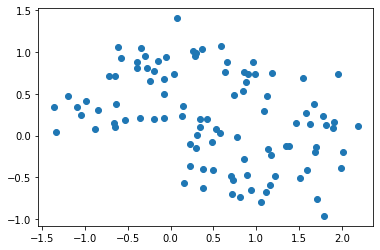

In [92]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],X[:,1])

In [93]:
model = LogitRegression( learning_rate = 0.01, iterations = 1000 )

model.fit( X, y ) 

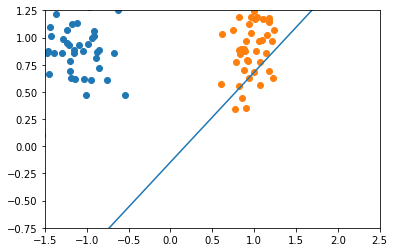

In [94]:
x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
x_values = [-5, 105]
parameters = np.array([model.b] + [x for x in model.W])
#parameters = np.array([-25.16131856, 0.20623159, 0.20147149])
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

# plots

plt.xlim([-1.5, 2.5])
plt.ylim([-0.75, 1.25])
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])
plt.plot(x_values, y_values)
plt.show()

In [95]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    #plt.xlim([-2, 2])
    #plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [96]:
plot_decision_boundary(X, np.array([x for x in model.W]), model.b)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'